# Transformer Single-Step Prediction

In [1]:
from model.transformer_singlestep import *
from function_file.ML_functions import make_dataframe
import torch
import torch.nn as nn
import time
import math

input_window = 100 # number of input steps
output_window = 1 # number of prediction steps, in this model its fixed to one
block_len = input_window + output_window # for one input-output pair
batch_size = 1024
device = "cuda" if torch.cuda.is_available() else "cpu"
model = TransAm().to(device)

_, df = make_dataframe(60,20)
train_data, val_data = get_data(df)

criterion = nn.MSELoss()
lr = 0.001
#optimizer = torch.optim.SGD(model.parameters(), lr=lr)
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 1, gamma=0.95)
epochs = 100 # The number of epochs
best_model = None

| epoch   1 |   103/  519 batches | lr 0.001000 | 120.63 ms | loss 0.11193 | ppl     1.12
| epoch   1 |   206/  519 batches | lr 0.001000 | 111.23 ms | loss 0.09319 | ppl     1.10
| epoch   1 |   309/  519 batches | lr 0.001000 | 110.47 ms | loss 0.07820 | ppl     1.08
| epoch   1 |   412/  519 batches | lr 0.001000 | 109.83 ms | loss 0.07105 | ppl     1.07
| epoch   1 |   515/  519 batches | lr 0.001000 | 108.71 ms | loss 0.07713 | ppl     1.08
-----------------------------------------------------------------------------------------
| end of epoch   1 | time: 63.35s | valid loss 0.15794 | valid ppl     1.17
-----------------------------------------------------------------------------------------
| epoch   2 |   103/  519 batches | lr 0.000902 | 109.74 ms | loss 0.11189 | ppl     1.12
| epoch   2 |   206/  519 batches | lr 0.000902 | 109.19 ms | loss 0.09317 | ppl     1.10
| epoch   2 |   309/  519 batches | lr 0.000902 | 108.31 ms | loss 0.07817 | ppl     1.08
| epoch   2 |   412/  51

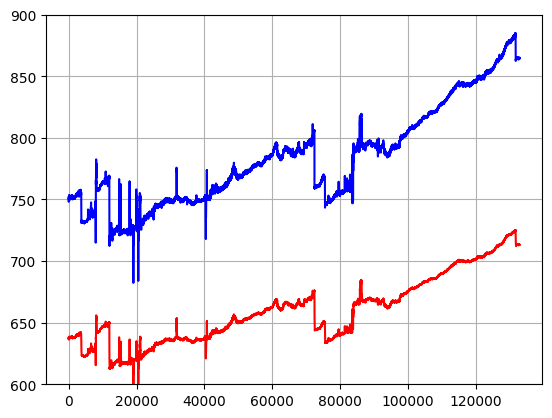

-----------------------------------------------------------------------------------------
| end of epoch   5 | time: 216.64s | valid loss 0.15791 | valid ppl     1.17
-----------------------------------------------------------------------------------------
| epoch   6 |   103/  519 batches | lr 0.000735 | 110.38 ms | loss 0.11192 | ppl     1.12
| epoch   6 |   206/  519 batches | lr 0.000735 | 108.88 ms | loss 0.09317 | ppl     1.10
| epoch   6 |   309/  519 batches | lr 0.000735 | 109.52 ms | loss 0.07820 | ppl     1.08
| epoch   6 |   412/  519 batches | lr 0.000735 | 108.87 ms | loss 0.07106 | ppl     1.07
| epoch   6 |   515/  519 batches | lr 0.000735 | 108.87 ms | loss 0.07711 | ppl     1.08
-----------------------------------------------------------------------------------------
| end of epoch   6 | time: 61.92s | valid loss 0.15794 | valid ppl     1.17
-----------------------------------------------------------------------------------------
| epoch   7 |   103/  519 batches | l

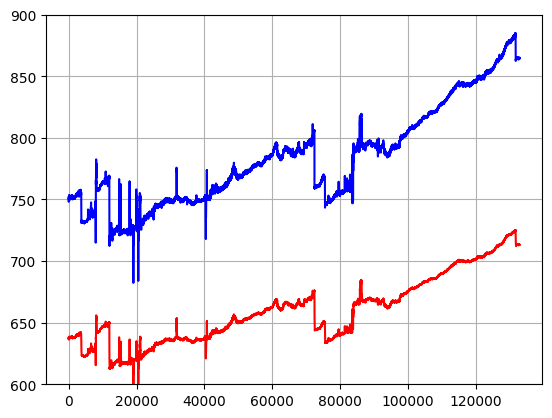

-----------------------------------------------------------------------------------------
| end of epoch  10 | time: 214.57s | valid loss 0.15791 | valid ppl     1.17
-----------------------------------------------------------------------------------------
| epoch  11 |   103/  519 batches | lr 0.000569 | 111.45 ms | loss 0.11191 | ppl     1.12
| epoch  11 |   206/  519 batches | lr 0.000569 | 109.75 ms | loss 0.09320 | ppl     1.10
| epoch  11 |   309/  519 batches | lr 0.000569 | 109.45 ms | loss 0.07827 | ppl     1.08
| epoch  11 |   412/  519 batches | lr 0.000569 | 109.72 ms | loss 0.07107 | ppl     1.07
| epoch  11 |   515/  519 batches | lr 0.000569 | 106.97 ms | loss 0.07714 | ppl     1.08
-----------------------------------------------------------------------------------------
| end of epoch  11 | time: 61.83s | valid loss 0.15794 | valid ppl     1.17
-----------------------------------------------------------------------------------------
| epoch  12 |   103/  519 batches | l

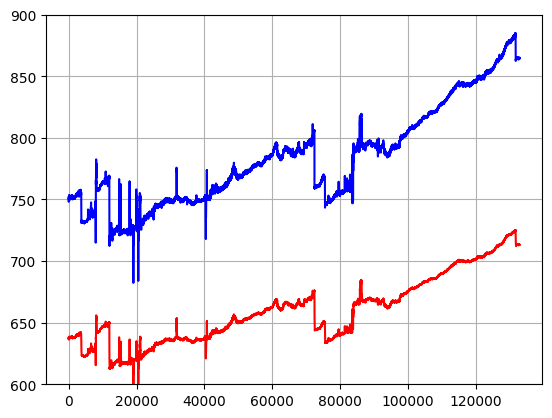

-----------------------------------------------------------------------------------------
| end of epoch  15 | time: 211.56s | valid loss 0.15791 | valid ppl     1.17
-----------------------------------------------------------------------------------------
| epoch  16 |   103/  519 batches | lr 0.000440 | 111.78 ms | loss 0.11199 | ppl     1.12
| epoch  16 |   206/  519 batches | lr 0.000440 | 109.16 ms | loss 0.09315 | ppl     1.10


KeyboardInterrupt: 

In [2]:
for epoch in range(1, epochs + 1):
    epoch_start_time = time.time()
    train(train_data, optimizer, criterion,epoch, scheduler)
    if ( epoch % 5== 0 ):
        test_result, truth, val_loss = plot_and_loss(model, val_data, criterion)
        #predict_future(model, val_data,5000)
    else:
        val_loss = evaluate(model, val_data, criterion)
   
    print('-' * 89)
    print('| end of epoch {:3d} | time: {:5.2f}s | valid loss {:5.5f} | valid ppl {:8.2f}'.format(epoch, (time.time() - epoch_start_time),
                                     val_loss, math.exp(val_loss)))
    print('-' * 89)

    #if val_loss < best_val_loss:
    #    best_val_loss = val_loss
    #    best_model = model

    scheduler.step() 